## 신경망의 수학적 구성요소

### 1. 신경망 훑어보기

#### 케라스 이용해서 MNIST 데이터셋을 적재

In [15]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#### 훈련 데이터 / 테스트 데이터 살펴보기

In [16]:
print(f'Train images shape: {train_images.shape}, length: {len(train_images)}')
print(f'Test images shape: {test_images.shape}, length: {len(test_images)}')

Train images shape: (60000, 28, 28), length: 60000
Test images shape: (10000, 28, 28), length: 10000


#### 신경망 구조

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#### 컴파일

In [18]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### 이미지 데이터 준비하기

In [19]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255 # 255로 나누어 0~1 사이의 값으로 정규화
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255 # 255로 나누어 0~1 사이의 값으로 정규화

#### 모델 훈련하기

In [20]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2547 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1046 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0688 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0491 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0379 - accuracy: 0.9885


#### 모델을 사용하여 예측 만들기

In [21]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([6.6812760e-09, 6.0640756e-11, 3.9211287e-07, 2.7299544e-05,
       4.2678209e-12, 1.3394897e-07, 4.5295911e-12, 9.9997199e-01,
       3.2470229e-08, 2.6499220e-07], dtype=float32)

In [22]:
predictions[0].argmax()  # 예측한 숫자, 가장 높은 확률을 가진 인덱스 반환

7

#### 예측값과 실제가 맞았는지 확인하기

In [23]:
if predictions[0].argmax() == test_labels[0]:
    print("정답입니다!")

정답입니다!


#### 새로운 데이터에서 모델 평가하기

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.0707 - accuracy: 0.9783
Test accuracy: 0.9782999753952026


### 2. 신경망을 위한 데이터표현

#### 데이터셋 호출 및 형태 확인

In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f'축의 개수: {train_images.ndim}')
print(f'훈련 이미지의 형상: {train_images.shape}')
print(f'훈련 이미지의 데이터 타입: {train_images.dtype}')

축의 개수: 3
훈련 이미지의 형상: (60000, 28, 28)
훈련 이미지의 데이터 타입: uint8


#### 여섯 번째 이미지 출력

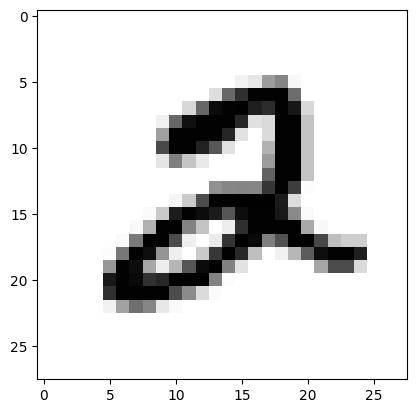

In [4]:
import matplotlib.pyplot as plt

digit = train_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [5]:
train_labels[5]

2

In [6]:
my_slice = train_images[10:100]
print(f'슬라이스된 이미지의 형상: {my_slice.shape}')  

슬라이스된 이미지의 형상: (90, 28, 28)


#### 배치 데이터

In [7]:
batch1 = train_images[0:128]
batch2 = train_images[128:256]
print(f'배치1의 형상: {batch1.shape}')
print(f'배치2의 형상: {batch2.shape}')

배치1의 형상: (128, 28, 28)
배치2의 형상: (128, 28, 28)


#### 텐서 연산

In [8]:
def naive_relu(x):
    assert len(x.shape) == 2  # 2D 텐서인지 확인, x는 랭크-2 넘파이 배열
    x = x.copy() # 입력 텐서 자체를 바꾸지 않도록 복사
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

#### 시간 비교 (numpy 연산 vs. 일반 연산)

In [11]:
import numpy as np
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0)
print(f'넘파이 연산 걸린 시간 : {time.time() - t0:.2f} s')

t1 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print(f'나이브 연산 걸린 시간 : {time.time() - t1:.2f} s')

넘파이 연산 걸린 시간 : 0.01 s
나이브 연산 걸린 시간 : 0.74 s


#### 브로드캐스팅

In [12]:
x = np.random.random((32,10)) 
y = np.random.random((10,))

y = np.expand_dims(y, axis=0)

Y = np.concatenate([y]*32, axis=0)  # y를 32번 복제하여 배치 크기에 맞춤

def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x


#### 텐서 곱셈

In [4]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z=0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2 # x는 넘파이 행렬
    assert len(y.shape) == 1 # y는 넘파이 벡터
    assert x.shape[1] == y.shape[0] # x의 두 번째 차원이 y의 첫 번째 차원과 같아야 합니다
    z = np.zeros(x.shape[0]) # 이 연산은 x의 행과 같은 크기의 0이 채워진 벡터를 만듭니다.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i,j] * y[j]
    return z

def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

#### 텐서플로의 그레이디언트 테이프

In [7]:
import tensorflow as tf

x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2*x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

x = tf.Variable(tf.zeros((2,2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

W = tf.Variable(tf.random.uniform((2,2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2,2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W = tape.gradient(y, [W,b])


#### 텐서플로를 사용하여 밑바닥부터 구현해보기

In [14]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)
    
    @property
    def weights(self):
        return [self.W, self.b]
    
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x
    
    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights

import math    

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels
    
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(learning_rate * g)

from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f'에포크 {epoch_counter}')
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f'  배치 {batch_counter}, 손실값: {loss:.2f}')

In [15]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

model = NaiveSequential([
    NaiveDense(input_size = 28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])

fit(model, train_images, train_labels, epochs=10, batch_size=128)

에포크 0
  배치 0, 손실값: 4.55
  배치 100, 손실값: 2.24
  배치 200, 손실값: 2.22
  배치 300, 손실값: 2.07
  배치 400, 손실값: 2.20
에포크 1
  배치 0, 손실값: 1.91
  배치 100, 손실값: 1.88
  배치 200, 손실값: 1.84
  배치 300, 손실값: 1.69
  배치 400, 손실값: 1.82
에포크 2
  배치 0, 손실값: 1.59
  배치 100, 손실값: 1.59
  배치 200, 손실값: 1.52
  배치 300, 손실값: 1.41
  배치 400, 손실값: 1.50
에포크 3
  배치 0, 손실값: 1.34
  배치 100, 손실값: 1.35
  배치 200, 손실값: 1.26
  배치 300, 손실값: 1.20
  배치 400, 손실값: 1.28
에포크 4
  배치 0, 손실값: 1.14
  배치 100, 손실값: 1.17
  배치 200, 손실값: 1.06
  배치 300, 손실값: 1.04
  배치 400, 손실값: 1.11
에포크 5
  배치 0, 손실값: 1.00
  배치 100, 손실값: 1.03
  배치 200, 손실값: 0.92
  배치 300, 손실값: 0.92
  배치 400, 손실값: 0.99
에포크 6
  배치 0, 손실값: 0.89
  배치 100, 손실값: 0.92
  배치 200, 손실값: 0.81
  배치 300, 손실값: 0.83
  배치 400, 손실값: 0.90
에포크 7
  배치 0, 손실값: 0.81
  배치 100, 손실값: 0.84
  배치 200, 손실값: 0.73
  배치 300, 손실값: 0.76
  배치 400, 손실값: 0.83
에포크 8
  배치 0, 손실값: 0.74
  배치 100, 손실값: 0.77
  배치 200, 손실값: 0.67
  배치 300, 손실값: 0.71
  배치 400, 손실값: 0.78
에포크 9
  배치 0, 손실값: 0.69
  배치 100, 손실값: 0.71
  배치 200, 손실값: 0.62


In [17]:
import numpy as np

predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f'accuracy : {matches.mean():.2f}')

accuracy : 0.82


## Notes

##### 클래스와 레이블에 관한 노트

- 머신 러닝에서 분류 문제의 범주(category)를 클래스(class)라고 한다. 데이터 포인트는 샘플(sample)이라고 한다. 특정 샘플의 클래스는 레이블(label)이라고 한다.

#### 신경망의 핵심구조

- 신경망의 핵심 구성 요소는 층이다. 층은 데이터를 위한 필터(filter)로 생각할 수 있다. 어떤 데이터가 들어가면 더 유용한 형태로 출력된다. 조금 더 구체적으로 층은 주어진 문제에 더 의미있는 표현을 입력된 데이터로부터 추출한다.

#### 신경망의 훈련준비를 마치기 위한 컴파일 단계에서의 결정 사항

- 옵티마이저(optimizer) : 성능을 향상시키기 위해 입력된 데이터를 기반으로 모델을 업데이트하는 메커니즘

- 손실 함수(loss function) : 훈련 데이터에서 모델의 성능을 측정하는 방법으로 모델이 옳은 방향으로 학습될 수 있도록 도와준다.

- 훈련과 테스트 과정을 모니터링할 지표

#### 기본 데이터 구조인 텐서

- 텐서는 데이터를 위한 컨테이너이다. 일반적으로 수치형 데이터를 다루므로 숫자를 위한 컨테이너이다. *행렬*은 *랭크-2 텐서*이다. 텐서는 일반적으로 임의의 차원 개수를 가지는 행렬의 일반화된 모습이다. 텐서에서는 차원(dimension)을 종종 축(axis)라고 부른다.

- 스칼라(랭크-0 텐서), 벡터(링크-1텐서), 행렬(랭크-2텐서), 랭크-3텐서와 더 높은 텐서

#### 텐서의 핵심 속성

- 축의 개수(랭크) : 랭크-3텐서에는 3개의 축이 있고, 행렬(랭크-2 텐서)에는 2개의 축이 있다. 넘파이나 텐서플로 같은 파이썬 라이브러리에서는 ndim 속성에 저장되어 있다.

- 크기 : 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 파이썬의 튜플(tuple)이다.

- 데이터 타입 : 텐서에 포함된 데이터의 타입으로, float16, float32, uint8 등등이 될 수 있다. 텐서플로에서는 string 텐서를 사용하기도 한다.

#### 텐서의 실제 사례

- 벡터 데이터 : (samples, features)

- 시계열 데이터 : (samples, timesteps, features)

- 이미지 : (samples, height, width, channels) & (samples, channels, height, width)

- 동영상 : (samples, frames, height, width, channels) & (samples, frames, channels, height, width)

#### 브로드캐스팅

- 큰 텐서의 ndim에 맞도록 작은 텐서에 (브로드캐스팅 축이라고 부르는) 축이 추가된다.

- 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복된다.

#### 그레이디언트 기반 최적화

- 훈련 샘플 x와 이에 상응하는 타깃 y_true의 배치를 추출합니다.

- x를 사용하여 모델을 실행하고(정방향 패스(forward pass) 단계), 예측 y_pred를 구한다.

- y_pred와 y_true의 차이를 측정하여 이 배치에 대한 모델의 손실을 계산한다.

- 배치에 대한 손실이 조금 감소되도록 모델의 모든 가중치를 업데이트한다.

=> 결국 훈련 데이터에서 모델의 손실, 즉 예측 y_pred와 타깃 y_true의 오차가 매우 작아질것이고, 이 모델은 입력에 정확한 타깃을 매핑하는 것을 학습한다.

#### 도함수 연결 : 역전파 알고리즘

- 연쇄 법칙 

- 계산 그래프